<span style="color:white; font-size:larger; background-color:red">
>Project title :FIFA World Cup Analysis,

    >Technologies :Data Science

     >Domain:Sports

     >Project Difficulties level:Advanced

</span>



## Problem statement
<span style="color:red; font-size:larger; background-color:white">
      The World Cups dataset shows all information about all the World Cups in history, while the
World Cup Matches dataset shows all the results from the matches contested as part of the
cups. Find key metrics and factors that influence the World Cup win. Do your own research
and come up with your findings.
</span>

## Importing all the necessary modules for Analyzing the data.

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings 
from IPython.display import display, HTML

In [2]:
#Creating the data from the WorldCupMatches csv file.
df=pd.read_csv("WorldCupMatches.csv")
df.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [3]:
#To know the total number of rows and columns.
df.shape

(4572, 20)

## So this data frame has 4572 rows and 20 columns.

In [4]:
#Getting  all information of the data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [5]:
#To get the statistical analysis on the data frame df.
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [6]:
#Taking our necessary datas for calculatig the result.
df_new=df[["Year","Datetime","Stadium","Home Team Name","Home Team Goals","Away Team Name","Away Team Goals","Half-time Home Goals","Half-time Away Goals"]]
df_new.head(10)


,Year,Datetime,Stadium,Home Team Name,Home Team Goals,Away Team Name,Away Team Goals,Half-time Home Goals,Half-time Away Goals
0,1930.0,13 Jul 1930 - 15:00,Pocitos,France,4.0,Mexico,1.0,3.0,0.0
1,1930.0,13 Jul 1930 - 15:00,Parque Central,USA,3.0,Belgium,0.0,2.0,0.0
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Yugoslavia,2.0,Brazil,1.0,2.0,0.0
3,1930.0,14 Jul 1930 - 14:50,Pocitos,Romania,3.0,Peru,1.0,1.0,0.0
4,1930.0,15 Jul 1930 - 16:00,Parque Central,Argentina,1.0,France,0.0,0.0,0.0
5,1930.0,16 Jul 1930 - 14:45,Parque Central,Chile,3.0,Mexico,0.0,1.0,0.0
6,1930.0,17 Jul 1930 - 12:45,Parque Central,Yugoslavia,4.0,Bolivia,0.0,0.0,0.0
7,1930.0,17 Jul 1930 - 14:45,Parque Central,USA,3.0,Paraguay,0.0,2.0,0.0
8,1930.0,18 Jul 1930 - 14:30,Estadio Centenario,Uruguay,1.0,Peru,0.0,0.0,0.0
9,1930.0,19 Jul 1930 - 12:50,Estadio Centenario,Chile,1.0,France,0.0,0.0,0.0


In [7]:
# Data Cleaning
# Check for missing values
print("Missing values:\n", df_new.isnull().sum())


Missing values:
 Year                    3720
Datetime                3720
Stadium                 3720
Home Team Name          3720
Home Team Goals         3720
Away Team Name          3720
Away Team Goals         3720
Half-time Home Goals    3720
Half-time Away Goals    3720
dtype: int64


In [8]:
#Droping the missing values and checking whether it is cleared or not.
df_new=df_new.dropna()
print("Missing values:\n", df_new.isnull().sum())

Missing values:
 Year                    0
Datetime                0
Stadium                 0
Home Team Name          0
Home Team Goals         0
Away Team Name          0
Away Team Goals         0
Half-time Home Goals    0
Half-time Away Goals    0
dtype: int64


## So the missing values now cleared... now we can do operation on it.

In [9]:
# Data Exploration
# Summary statistics
print("Summary statistics:\n", df_new.describe())



Summary statistics:
               Year  Home Team Goals  Away Team Goals  Half-time Home Goals  \
count   852.000000       852.000000       852.000000            852.000000   
mean   1985.089202         1.811033         1.022300              0.708920   
std      22.448825         1.610255         1.087573              0.937414   
min    1930.000000         0.000000         0.000000              0.000000   
25%    1970.000000         1.000000         0.000000              0.000000   
50%    1990.000000         2.000000         1.000000              0.000000   
75%    2002.000000         3.000000         2.000000              1.000000   
max    2014.000000        10.000000         7.000000              6.000000   

       Half-time Away Goals  
count            852.000000  
mean               0.428404  
std                0.691252  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                1.000000  
max                5.000000  


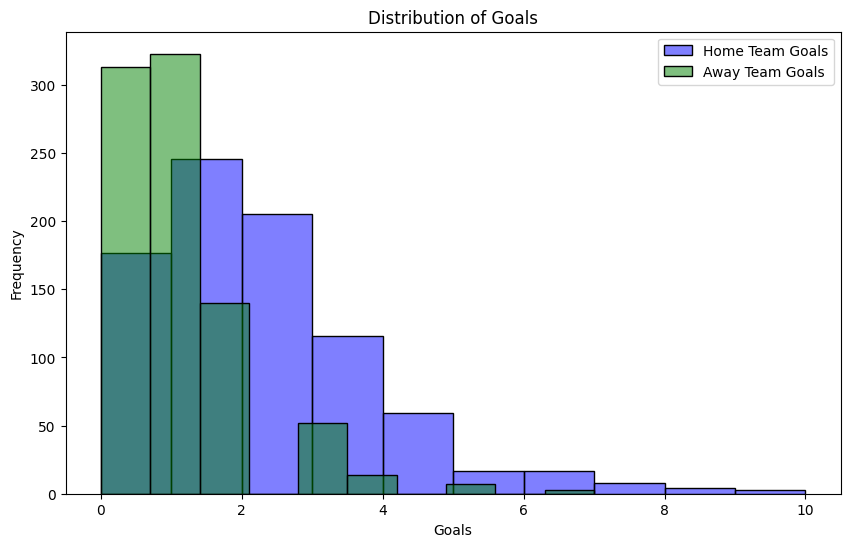

In [10]:
# Visualization
# Visualize distribution of goals
plt.figure(figsize=(10, 6))
sns.histplot(df_new['Home Team Goals'], bins=10, color='blue', alpha=0.5, label='Home Team Goals')
sns.histplot(df_new['Away Team Goals'], bins=10, color='green', alpha=0.5, label='Away Team Goals')
plt.xlabel('Goals')
plt.ylabel('Frequency')
plt.title('Distribution of Goals')
plt.legend()
plt.show()

# From this We came to know that :
>Home teams scores atleast one goal most of the time while Away team scores zero or one goals most of the time.
>From this it is minoritically cleared that Home team has more advantage to win the match.


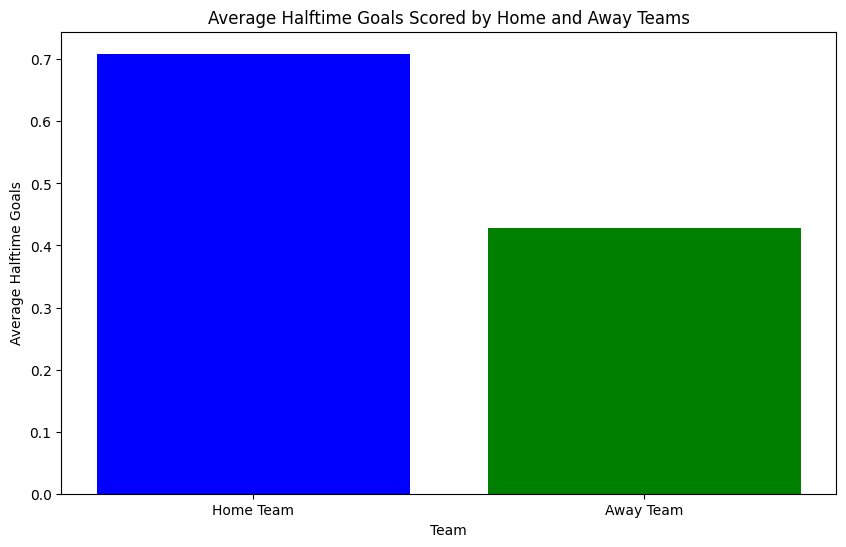

In [11]:
# Visualization
# Create a bar plot to compare halftime goals of home and away teams
plt.figure(figsize=(10, 6))

# Calculate mean halftime goals for home and away teams
mean_home_goals = df_new['Half-time Home Goals'].mean()
mean_away_goals = df_new['Half-time Away Goals'].mean()

# Plot bar plot
plt.bar(['Home Team', 'Away Team'], [mean_home_goals, mean_away_goals], color=['blue', 'green'])
plt.xlabel('Team')
plt.ylabel('Average Halftime Goals')
plt.title('Average Halftime Goals Scored by Home and Away Teams')
plt.show()

## From the above it is cleared that :
>Home team always have advantages before half time ...

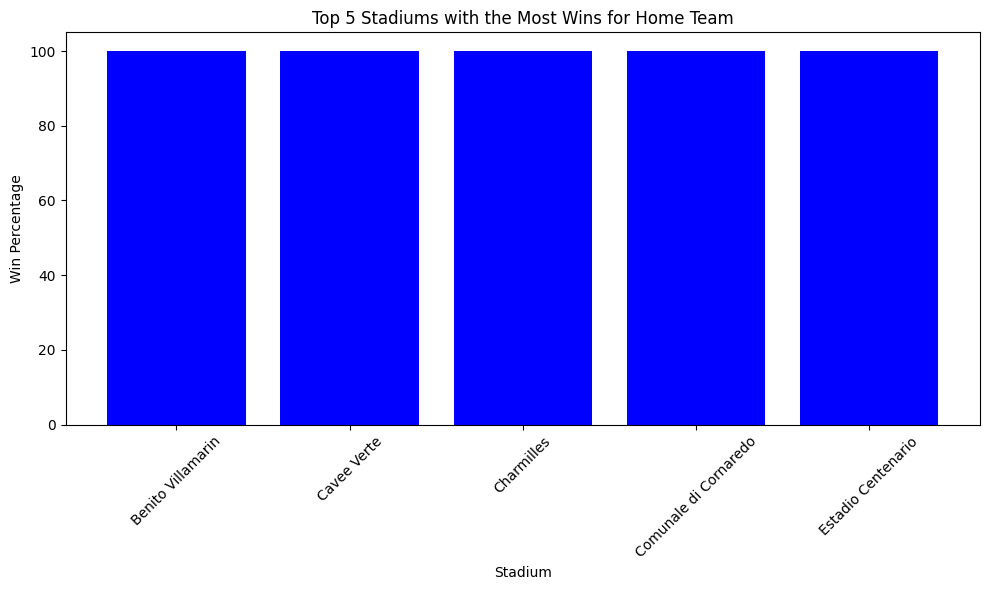

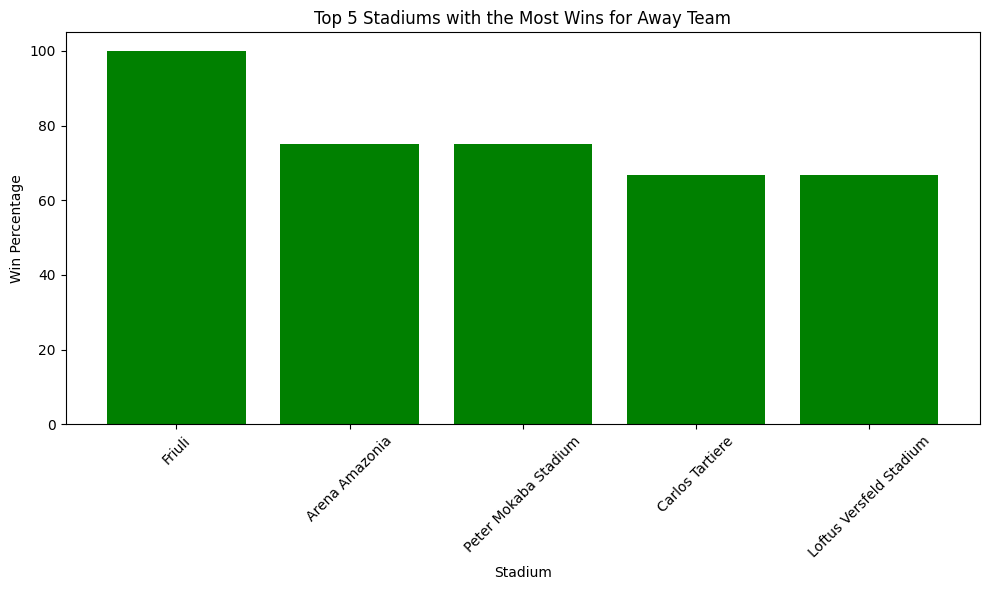

In [12]:
#Finding top 5 Stadiums with the Most Wins for Home Team and top 5 Stadiums with the Most Wins for Away team.

# Calculate total matches played in each stadium
total_matches = df_new.groupby('Stadium').size()

# Calculating total matches won by home and away teams in each stadium
home_wins = df_new[df_new['Home Team Goals'] > df_new['Away Team Goals']].groupby('Stadium').size()
away_wins = df_new[df_new['Away Team Goals'] > df_new['Home Team Goals']].groupby('Stadium').size()

# Calculating win percentages for home and away teams in each stadium
home_win_percentages = (home_wins / total_matches) * 100
away_win_percentages = (away_wins / total_matches) * 100

# Sorting  stadiums based on win percentages for home and away teams
top_home_stadiums = home_win_percentages.nlargest(5)  # Select top 5 stadiums with the most wins for home team
top_away_stadiums = away_win_percentages.nlargest(5)  # Select top 5 stadiums with the most wins for away team


plt.figure(figsize=(10, 6))
plt.bar(top_home_stadiums.index, top_home_stadiums, color='blue')
plt.title('Top 5 Stadiums with the Most Wins for Home Team')
plt.xlabel('Stadium')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(top_away_stadiums.index, top_away_stadiums, color='green')
plt.title('Top 5 Stadiums with the Most Wins for Away Team')
plt.xlabel('Stadium')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## From the above diagram it is cleared that:
>The Home teams has more percentage of win if they play in any of the  ground.

>The away team has very much high win prediction if they play in the friuli followed by Areana Amazonia,Peter Mokaba stadium.
  

In [13]:
df_new=df[["Year","Datetime","Stadium","Home Team Name","Home Team Goals","Away Team Name","Away Team Goals","Half-time Home Goals","Half-time Away Goals"]]
df_new.head(10)

,Year,Datetime,Stadium,Home Team Name,Home Team Goals,Away Team Name,Away Team Goals,Half-time Home Goals,Half-time Away Goals
0,1930.0,13 Jul 1930 - 15:00,Pocitos,France,4.0,Mexico,1.0,3.0,0.0
1,1930.0,13 Jul 1930 - 15:00,Parque Central,USA,3.0,Belgium,0.0,2.0,0.0
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Yugoslavia,2.0,Brazil,1.0,2.0,0.0
3,1930.0,14 Jul 1930 - 14:50,Pocitos,Romania,3.0,Peru,1.0,1.0,0.0
4,1930.0,15 Jul 1930 - 16:00,Parque Central,Argentina,1.0,France,0.0,0.0,0.0
5,1930.0,16 Jul 1930 - 14:45,Parque Central,Chile,3.0,Mexico,0.0,1.0,0.0
6,1930.0,17 Jul 1930 - 12:45,Parque Central,Yugoslavia,4.0,Bolivia,0.0,0.0,0.0
7,1930.0,17 Jul 1930 - 14:45,Parque Central,USA,3.0,Paraguay,0.0,2.0,0.0
8,1930.0,18 Jul 1930 - 14:30,Estadio Centenario,Uruguay,1.0,Peru,0.0,0.0,0.0
9,1930.0,19 Jul 1930 - 12:50,Estadio Centenario,Chile,1.0,France,0.0,0.0,0.0


In [14]:
# Knowing which team has win most of the time as a away or home team.

# Creating a new column to indicate the winner of each match
df_new['Winner'] = df_new.apply(lambda row: row['Home Team Name'] if row['Home Team Goals'] > row['Away Team Goals'] else row['Away Team Name'] if row['Away Team Goals'] > row['Home Team Goals'] else 'Draw', axis=1)

# Counting the occurrences of each team in the "Winner" column
win_counts = df_new['Winner'].value_counts()

# Separating  draws and count them.
draw_count = win_counts.get('Draw', 0)

#Excluding draws from the count and determine which team has the most wins
win_counts = win_counts[win_counts.index != 'Draw']
if not win_counts.empty:
    team_with_most_wins = win_counts.idxmax()
    most_wins_count = win_counts.max()
    print("Team with most wins (either home or away):", team_with_most_wins)
    print("Number of wins (either home or away):", most_wins_count)
else:
    print("There are no wins to determine the team with the most wins.")

print("Number of draw matches:", draw_count)


Team with most wins (either home or away): Brazil
Number of wins (either home or away): 71
Number of draw matches: 3910


C:\Users\hp\AppData\Local\Temp\ipykernel_8912\2522186280.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Winner'] = df_new.apply(lambda row: row['Home Team Name'] if row['Home Team Goals'] > row['Away Team Goals'] else row['Away Team Name'] if row['Away Team Goals'] > row['Home Team Goals'] else 'Draw', axis=1)


## From the above out put it is cleared that most success the team in this tournament is Brazil	with total 71 wins.


In [15]:
df_new.head()

,Year,Datetime,Stadium,Home Team Name,Home Team Goals,Away Team Name,Away Team Goals,Half-time Home Goals,Half-time Away Goals,Winner
0,1930.0,13 Jul 1930 - 15:00,Pocitos,France,4.0,Mexico,1.0,3.0,0.0,France
1,1930.0,13 Jul 1930 - 15:00,Parque Central,USA,3.0,Belgium,0.0,2.0,0.0,USA
2,1930.0,14 Jul 1930 - 12:45,Parque Central,Yugoslavia,2.0,Brazil,1.0,2.0,0.0,Yugoslavia
3,1930.0,14 Jul 1930 - 14:50,Pocitos,Romania,3.0,Peru,1.0,1.0,0.0,Romania
4,1930.0,15 Jul 1930 - 16:00,Parque Central,Argentina,1.0,France,0.0,0.0,0.0,Argentina


In [16]:
## I want to import another csv file in which we have the data of winners team list with other attributes from 1930-2014.
df_cup=pd.read_csv("WorldCups.csv")
df_cup

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [17]:
#Getting the number data the data frame has.
df_cup.size

200

In [18]:
#Getting the number of rows and columns this data frame has
df_cup.shape

(20, 10)

In [19]:
#Getting all information about the data frame df_cup.
df_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


## From this it is cleared that the data frame has no null values.So we can go forward for EDA

In [20]:
#getting the statistical data of the data frame.
df_cup.describe()

,Year,GoalsScored,QualifiedTeams,MatchesPlayed
count,20.000000,20.000000,20.000000,20.000000
mean,1974.800000,118.950000,21.250000,41.800000
std,25.582889,32.972836,7.268352,17.218717
min,1930.000000,70.000000,13.000000,17.000000
25%,1957.000000,89.000000,16.000000,30.500000
50%,1976.000000,120.500000,16.000000,38.000000
75%,1995.000000,145.250000,26.000000,55.000000
max,2014.000000,171.000000,32.000000,64.000000


In [21]:
#Lets find the most time winner and runners-up,third and fourth  team and represent them in world map using folium li.

import folium
from IPython.display import display



#  Determining the most frequent winner, runners-up, third, and fourth-placed teams.
most_frequent_winner = df_cup['Winner'].value_counts().idxmax()
most_frequent_runners_up = df_cup['Runners-Up'].value_counts().idxmax()
most_frequent_third = df_cup['Third'].value_counts().idxmax()
most_frequent_fourth = df_cup['Fourth'].value_counts().idxmax()

#Getting the latitude and longitude coordinates of these countries.
country_coordinates = {
    'Winner': {'Brazil': (-14.235, -51.9253)},  # Brazil's coordinates
    'Runners-Up': {'Germany': (51.1657, 10.4515)},   # Germany's coordinates
    'Third': {'Netherlands': (52.1326, 5.2913)},  # Netherlands' coordinates
    'Fourth': {'Uruguay': (-32.5228, -55.7658)}  # Uruguay's coordinates
   
}

#  Creating a Folium map and mark these countries with custom markers.
# Initializing the map
mymap = folium.Map(location=[0, 0], zoom_start=2)

# Adding markers for the most frequent teams
for category, teams in country_coordinates.items():
    for country, coordinates in teams.items():
        folium.Marker(location=coordinates, popup=country).add_to(mymap)

# Display the map
display(mymap)


## Observation:
>Most of the time Winner is:Brazil

>Most of the  time Runners-Up is:Germany

>Most of the  time Third is:Netherlands

>Most of the  time fourth is:Uruguay


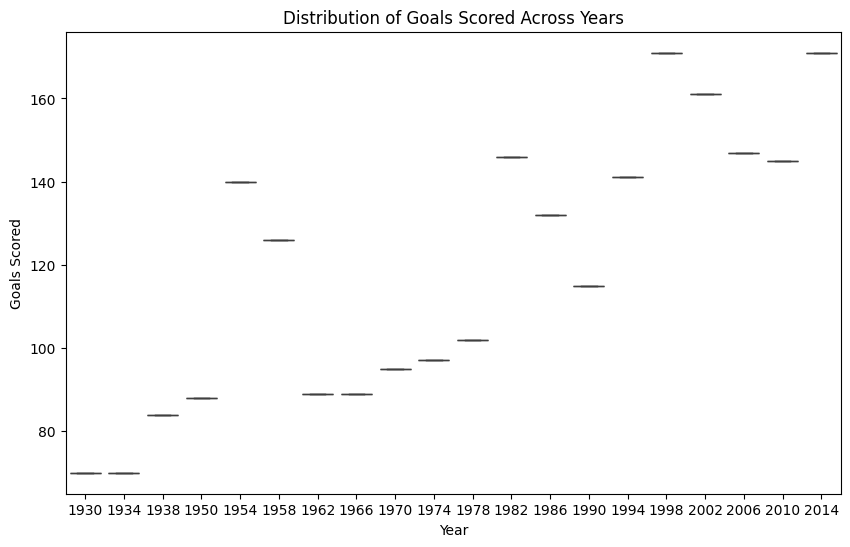

In [22]:
# Distribution of goals scored across different years
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='GoalsScored', data=df_cup)
plt.title('Distribution of Goals Scored Across Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()

## From the figure it is cleared that the numer of goals increasing with increasing  in year .
>Highest goals scored in the year of 1998

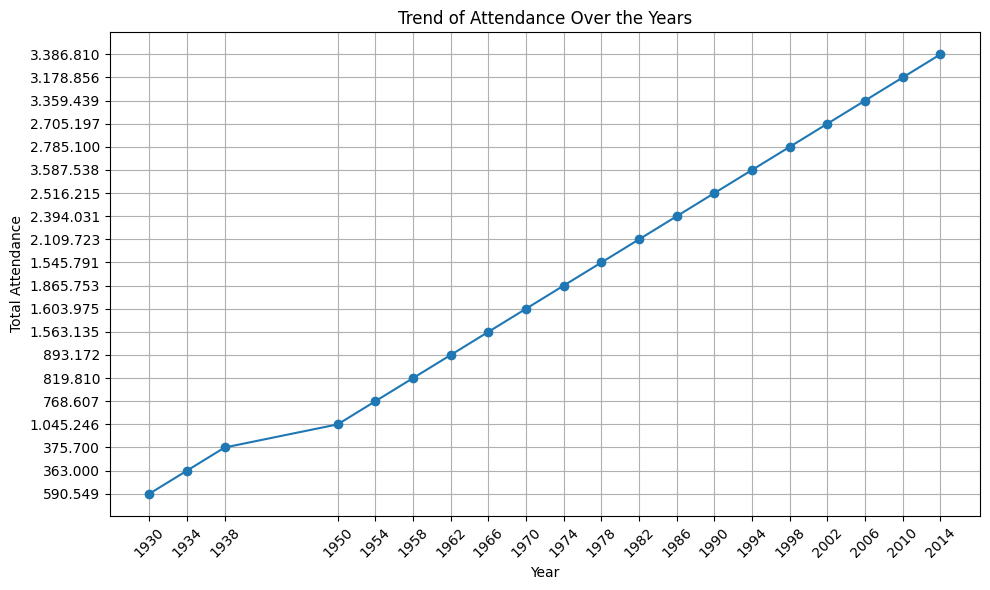

In [23]:
# Aggregate attendance data by year
attendance_by_year = df_cup.groupby('Year')['Attendance'].sum().reset_index()

# Plot the trend of attendance over the years
plt.figure(figsize=(10, 6))
plt.plot(attendance_by_year['Year'], attendance_by_year['Attendance'], marker='o', linestyle='-')
plt.title('Trend of Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Attendance')
plt.grid(True)
plt.xticks(attendance_by_year['Year'], rotation=45)
plt.tight_layout()
plt.show()


## Observation:
>From the above figure it is cleared that the trend of attendance over the years is increasing in a uniform manner slightly slow down through the year 
1938-1950.

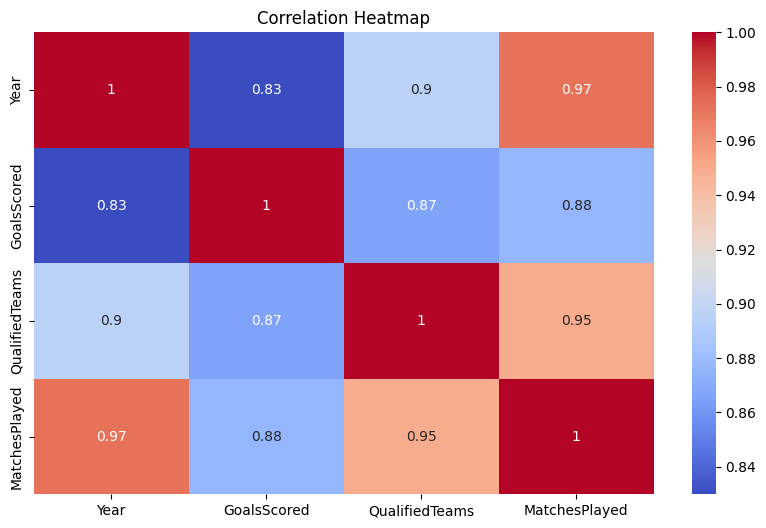

In [24]:
# Selecting only numeric columns for correlation analysis
numeric_columns = df_cup.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Observation:
>Year has very strong co-relation with MatchesPlayed followed by goalscored and Qualified teams.

>Goalscored has strong co-relation with MatchesPlayed followed by Qualified teams and year .

>Qualified teams has very strong co-relation with MatchesPlayed followed by goalscored and year.

>Matches played has very strong co-relation with year followed by Qualified teams and goalscored.

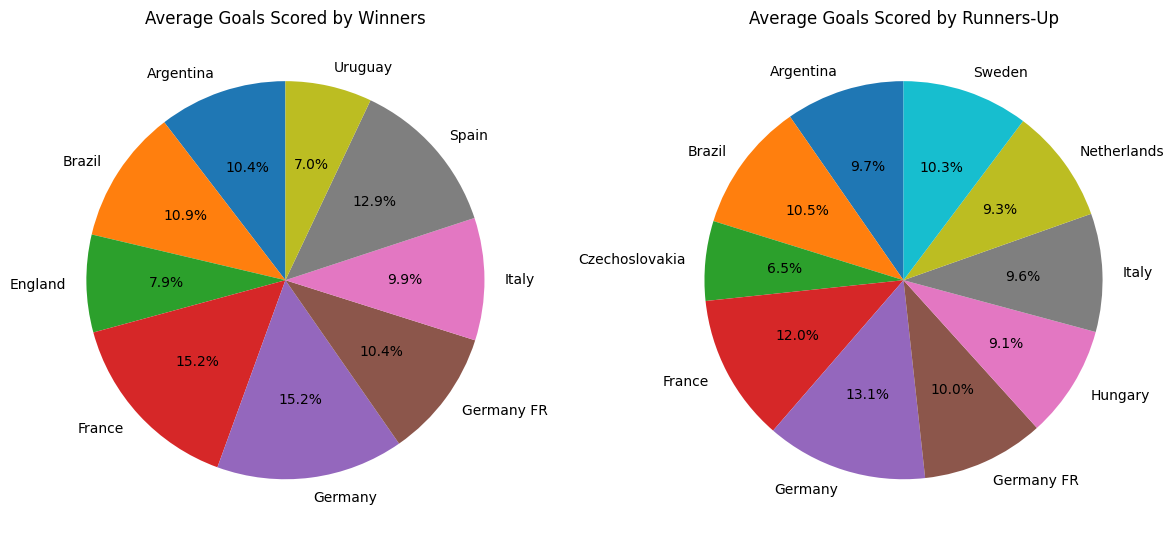

In [25]:
# Comparative Analysis

# Aggregating average goals scored by winners and runners-up
avg_goals_winner = df_cup.groupby('Winner')['GoalsScored'].mean().reset_index()
avg_goals_runner_up = df_cup.groupby('Runners-Up')['GoalsScored'].mean().reset_index()

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for average goals scored by winners
axes[0].pie(avg_goals_winner['GoalsScored'], labels=avg_goals_winner['Winner'], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Average Goals Scored by Winners')

# Pie chart for average goals scored by runners-up
axes[1].pie(avg_goals_runner_up['GoalsScored'], labels=avg_goals_runner_up['Runners-Up'], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Average Goals Scored by Runners-Up')

plt.tight_layout()
plt.show()

## Observation:
>Highest average goal scored as a winner team is France and Germany.

>Highest average goal scored as a  Runners-Up  team is  Germany followed by France.

In [26]:
#Fidig the highest crowd callig match from 1930-2014
# Find the match with the highest attendance
highest_attendance_match = df_cup[df_cup['Attendance'] == df_cup['Attendance'].max()]

# Printing the details of the match
print("Match with the highest attendance:")
print(highest_attendance_match)



Match with the highest attendance:
   Year Country  Winner      Runners-Up  Third      Fourth  GoalsScored  \
6  1962   Chile  Brazil  Czechoslovakia  Chile  Yugoslavia           89   

   QualifiedTeams  MatchesPlayed Attendance  
6              16             32    893.172  


In [27]:
#We have another csv file WorldCupPlayers,Let's analyze it .
df_players=pd.read_csv("WorldCupPlayers.csv")
df_players.head(30)


,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN
5,201,1096,MEX,LUQUE Juan (MEX),S,0,Rafael GARZA,C,NaN
6,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Andre MASCHINOT,NaN,G43' G87'
7,201,1096,MEX,LUQUE Juan (MEX),S,0,Hilario LOPEZ,NaN,NaN
8,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Etienne MATTLER,NaN,NaN
9,201,1096,MEX,LUQUE Juan (MEX),S,0,Dionisio MEJIA,NaN,NaN


In [28]:
#Getting the datas from the last 30 rows.
df_players.tail(30)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
37754,255959,300186501,GER,LOEW Joachim (GER),S,18,KROOS,NaN,NaN
37755,255959,300186501,ARG,SABELLA Alejandro (ARG),S,15,DEMICHELIS,NaN,NaN
37756,255959,300186501,GER,LOEW Joachim (GER),S,20,BOATENG,NaN,NaN
37757,255959,300186501,ARG,SABELLA Alejandro (ARG),S,16,ROJO,NaN,NaN
37758,255959,300186501,GER,LOEW Joachim (GER),S,23,KRAMER,NaN,O31'
37759,255959,300186501,ARG,SABELLA Alejandro (ARG),S,22,LAVEZZI,NaN,OH46'
37760,255959,300186501,GER,LOEW Joachim (GER),N,12,ZIELER,GK,NaN
37761,255959,300186501,ARG,SABELLA Alejandro (ARG),N,12,ORION,GK,NaN
37762,255959,300186501,GER,LOEW Joachim (GER),N,22,WEIDENFELLER,GK,NaN
37763,255959,300186501,ARG,SABELLA Alejandro (ARG),N,21,ANDUJAR,GK,NaN


In [29]:
#Cleanig the data frame and showing.
df_cleaned=df_players.dropna()
df_cleaned = df_cleaned.reset_index(drop=True)
df_cleaned.head(50)

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1090,USA,MILLAR Bob (USA),S,0,Tom FLORIE,C,G45'
1,201,1093,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G62'
2,201,1098,PER,BRU Francisco (ESP),S,0,Placido GALINDO,C,R70'
3,201,1091,BRA,DE CARVALHO Pindaro (BRA),S,0,PREGUINHO,C,G67' G83'
4,201,1089,PAR,DURAND LAGUNA Jose (ARG),S,0,Luis VARGAS PENA,C,G40'
5,201,1084,CHI,ORTH Gyorgy (HUN),S,0,Guillermo SUBIABRE,C,G15'
6,418,1106,AUT,MEISL Hugo (AUT),S,0,Johann HORVATH,C,G8'
7,3491,1105,AUT,MEISL Hugo (AUT),S,0,Johann HORVATH,C,G28'
8,206,1173,HUN,DIETZ Karoly (HUN),S,0,Gyorgy SAROSI,C,G28' G89'
9,206,1157,ROU,BRAUN Coloman (ROU),S,0,Stefan DOBAY,C,G35'


In [30]:
#Getting the the number of roes and columns.
df_cleaned.shape

(573, 9)

In [31]:
#Getting the total number of datas it has.
df_cleaned.size

5157

In [32]:
#Getting all informantion about the data frame.
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   RoundID        573 non-null    int64 
 1   MatchID        573 non-null    int64 
 2   Team Initials  573 non-null    object
 3   Coach Name     573 non-null    object
 4   Line-up        573 non-null    object
 5   Shirt Number   573 non-null    int64 
 6   Player Name    573 non-null    object
 7   Position       573 non-null    object
 8   Event          573 non-null    object
dtypes: int64(3), object(6)
memory usage: 40.4+ KB


## Now we have cleaned our data frame and can do EDA on it.


In [33]:
#Finding which country has more players to be play in the FIFA world cup.

players_per_country = df_cleaned.groupby('Team Initials')['Player Name'].nunique().reset_index()

# Sorting the results in descending order
players_per_country_sorted = players_per_country.sort_values(by='Player Name', ascending=False)

# Printing the country with the most players
most_players_country = players_per_country_sorted.iloc[0]
print("Country with the most players in FIFA World Cup:", most_players_country['Team Initials'])
print("Number of players:", most_players_country['Player Name'])


Country with the most players in FIFA World Cup: ARG
Number of players: 17


## from this df_cleaned data frame We can not extract any other insights

In [34]:
# Lets go back to our previous data frame df_cup and use a model on it for predicting the next world cup winner.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score



#Splitting data.
X = df_cup[['GoalsScored', 'QualifiedTeams', 'MatchesPlayed']]
y = df_cup['Winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Training the model
model = LogisticRegression()
model.fit(X_train, y_train)

#Evaluating the model.
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Asking  the user to input the predicted features for the next World Cup.
goals_scored = int(input("Enter the number of goals will be scored in the next World Cup as per your prediction: "))
qualified_teams = int(input("Enter the number of Qualified teams in the next World Cup: "))
matches_played = int(input("Enter the number of matches will be played in the next World Cup: "))

# Create a list of features
next_world_cup_features = [[goals_scored, qualified_teams, matches_played]]

# Using the trained model to predict the winner of the next World Cup
predicted_winner = model.predict(next_world_cup_features)
print("Predicted winner of the next World Cup:", predicted_winner)


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.25


Enter the number of goals will be scored in the next World Cup as per your prediction:  100
Enter the number of Qualified teams in the next World Cup:  32
Enter the number of matches will be played in the next World Cup:  64


Predicted winner of the next World Cup: ['Spain']


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## From the above Model you will be able to know the the Next World Cup winner As per your inputed prediction data for goals_scored, qualified_teams and  matches_played.

In [35]:
df_new=df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 852 entries, 0 to 851
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stadium               852 non-null    object 
 3   Home Team Name        852 non-null    object 
 4   Home Team Goals       852 non-null    float64
 5   Away Team Name        852 non-null    object 
 6   Away Team Goals       852 non-null    float64
 7   Half-time Home Goals  852 non-null    float64
 8   Half-time Away Goals  852 non-null    float64
 9   Winner                852 non-null    object 
dtypes: float64(5), object(5)
memory usage: 73.2+ KB


In [36]:
#Lets make another Model for the data frame df_matches ,For predicting the Winner of next world cup winner and Runners up.
# Feature Selection
X = df_new[['Home Team Goals', 'Away Team Goals', 'Half-time Home Goals', 'Half-time Away Goals']]
y = df_new[['Winner']]

# Splitting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluating model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Asking the user to input the features for the next World Cup
home_team_goals = float(input("Enter the number of goals scored by the home team: "))
away_team_goals = float(input("Enter the number of goals scored by the away team: "))
half_time_home_goals = float(input("Enter the number of half-time goals scored by the home team: "))
half_time_away_goals = float(input("Enter the number of half-time goals scored by the away team: "))

# Creating a list of features
next_world_cup_features = [[home_team_goals, away_team_goals, half_time_home_goals, half_time_away_goals]]

# Using the trained model to predict the winner and runners-up of the next World Cup
predicted_winner_runners_up = model.predict(next_world_cup_features)
print("Predicted winner of the next World Cup:", predicted_winner_runners_up)


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.23391812865497075


Enter the number of goals scored by the home team:  2
Enter the number of goals scored by the away team:  3
Enter the number of half-time goals scored by the home team:  1
Enter the number of half-time goals scored by the away team:  1


Predicted winner of the next World Cup: ['Draw']


C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## This prediction quite not useful as the above .So we will take the above prediction model (above this model) as the accurate model for prediction of Winner in the next world cup.

In [37]:
#Lastly I want to print the top 20 countries participated most of the time in world cup in the  world map using folium with a clear vizualization.

import folium
from collections import Counter

# Extracting list of countries from "Home Team Name" and "Away Team Name" columns
countries_home = df_new["Home Team Name"].tolist()
countries_away = df_new["Away Team Name"].tolist()
countries = countries_home + countries_away

# Counting the occurrences of each country
country_counts = Counter(countries)

# Printing the top 20 countries with the highest participation frequency
top_20_countries = dict(country_counts.most_common(20))
print("The top 20 countries are: ",top_20_countries)

The top 20 countries are:  {'Brazil': 108, 'Italy': 83, 'Argentina': 81, 'England': 62, 'Germany FR': 62, 'France': 61, 'Spain': 59, 'Mexico': 54, 'Netherlands': 54, 'Uruguay': 52, 'Germany': 48, 'Sweden': 46, 'Belgium': 43, 'Yugoslavia': 37, 'USA': 34, 'Chile': 34, 'Switzerland': 34, 'Hungary': 32, 'Soviet Union': 31, 'Poland': 31}


In [46]:
import folium

# Dictionary of top 20 countries with their participation frequency and coordinates
top_20_countries = {
    'Brazil': {'frequency': 108, 'coordinates': (-14.235, -51.9253)},
    'Italy': {'frequency': 83, 'coordinates': (41.8719, 12.5674)},
    'Argentina': {'frequency': 81, 'coordinates': (-38.4161, -63.6167)},
    'England': {'frequency': 62, 'coordinates': (52.3555, -1.1743)},
    'Germany FR': {'frequency': 62, 'coordinates': (51.1657, 10.4515)},
    'France': {'frequency': 61, 'coordinates': (46.6034, 1.8883)},
    'Spain': {'frequency': 59, 'coordinates': (40.4637, -3.7492)},
    'Mexico': {'frequency': 54, 'coordinates': (23.6345, -102.5528)},
    'Netherlands': {'frequency': 54, 'coordinates': (52.1326, 5.2913)},
    'Uruguay': {'frequency': 52, 'coordinates': (-32.5228, -55.7658)},
    'Germany': {'frequency': 48, 'coordinates': (51.1657, 10.4515)},
    'Sweden': {'frequency': 46, 'coordinates': (60.1282, 18.6435)},
    'Belgium': {'frequency': 43, 'coordinates': (50.5039, 4.4699)},
    'Yugoslavia': {'frequency': 37, 'coordinates': (44.0165, 21.0059)},
    'USA': {'frequency': 34, 'coordinates': (37.0902, -95.7129)},
    'Chile': {'frequency': 34, 'coordinates': (-35.6751, -71.543)},
    'Switzerland': {'frequency': 34, 'coordinates': (46.8182, 8.2275)},
    'Hungary': {'frequency': 32, 'coordinates': (47.1625, 19.5033)},
    'Soviet Union': {'frequency': 31, 'coordinates': (61.524, 105.3188)},
    'Poland': {'frequency': 31, 'coordinates': (51.9194, 19.1451)}
}

# Creating a map using Folium with a closer view
world_map = folium.Map(location=[10, 10], zoom_start=2)

# Add markers for each country in the top 20 list with labels
for country, data in top_20_countries.items():
    folium.Marker(data['coordinates'], 
                  popup=f"{country}: {data['frequency']} appearances", 
                  tooltip=country).add_to(world_map)

# Display the map
world_map


## CONCLUSOIN/OUTCOME:
## FIFA World Cup Analysis

- **Home teams scores atleast one goal most of the time while Away team scores zero or one goals most of the time. From this it is minoritically cleared that Home team has more advantage to win the match.**

- **Home team always have advantages before half time.**

- **The Home teams has more percentage of win if they play in any of the ground. The away team has very much high win prediction if they play in the friuli followed by Areana Amazonia, Peter Mokaba stadium.**

- **The most successful team of the FIFA world cup is Brazil with a total of 71 goals.**
  - *Most of the time Winner is:* **BRAZIL**
  - *Most of the time Runners-Up is:* **GERMANY**
  - *Most of the time Third is:* **NETHERLANDS**
  - *Most of the time fourth is:* **URUGUAY**

- **In the year of 1998 the highest number of goals has been scored.**

- **The trend of attendance over the years is increasing in a uniform manner slightly slow down through the year 1938-1950.**

- **The highest average goal scored as a winner team is France followed by Germany.**

- **The highest average goal scored as a Runners-Up team is Germany followed by France.**

- **The highest crowd-calling match is in the year of 1962 where (country=Chile Winner=Brazil Runners-up=Czechoslovakia Third=Chile Fourth=Yugoslavia).**

## FIFA World Cup Model

- **In the above section(shell 34) , I have built a Model on the basis of the provided data. Go through it, you will be able to know the next World Cup winner as per your inputted prediction data for goals_scored, qualified_teams, and matches_played.**




 <div align="center" style="color:red; font-size:larger;"><b>End of the Project</b></div>


